# Formula 1 Data Analysis Using Python 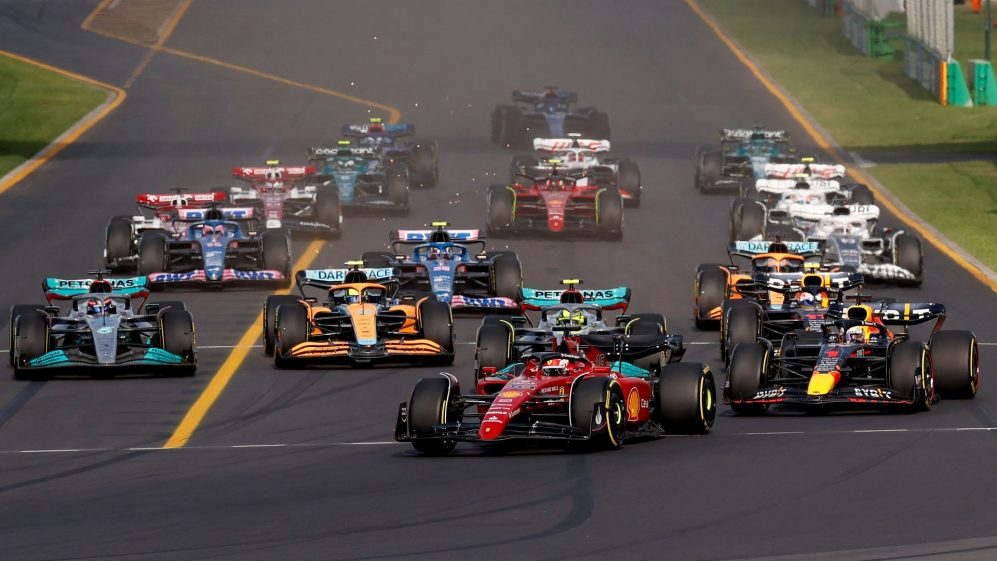

## Dataset Link
### https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

In [1]:
# install the dependencies
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt

In [2]:
# Load the Dataset
races=pd.read_csv("C:\\Users\\Pranav\\Desktop\\DATA SCIENCE DATA\\CVC file\\Formula F1\\races.csv")
result=pd.read_csv("C:\\Users\\Pranav\\Desktop\\DATA SCIENCE DATA\\CVC file\\Formula F1\\results.csv")
drivers=pd.read_csv("C:\\Users\\Pranav\\Desktop\\DATA SCIENCE DATA\\CVC file\\Formula F1\drivers.csv")
constructors=pd.read_csv("C:\\Users\\Pranav\\Desktop\\DATA SCIENCE DATA\\CVC file\\Formula F1\\constructors.csv")

In [3]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [4]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [5]:
result.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [6]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [7]:
dataset=pd.merge(result,races[['raceId','year','name','round']],on='raceId' ,how='left')
dataset=pd.merge(dataset,drivers[['driverId','driverRef','nationality']],on='driverId' ,how='left')
dataset=pd.merge(dataset,constructors[['constructorId','name','nationality']],on='constructorId' ,how='left')

In [8]:
# Drop The columns in Dataset
dataset.drop(['position','positionText','statusId','laps','fastestLap','statusId','resultId','raceId',
              'driverId','constructorId'],axis=1,inplace=True)

In [9]:
# Rename some Columns
dataset.rename(columns={'rank':'fastest_lap_rank','name_x':'gp_nam','nationality_x':'driver_nationality','name_y':'constructor_name','nationality_y':'constructor_nationality','driverRef':'driver'},inplace=True)

In [10]:
# Rearrange the columns
dataset=dataset[['year','gp_nam','round','driver','constructor_name','grid','positionOrder','points','time','milliseconds','fastest_lap_rank','fastestLapTime','fastestLapSpeed','driver_nationality']]
                  

In [11]:
dataset.head()

,year,gp_nam,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality
0,2008,Australian Grand Prix,1,hamilton,McLaren,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,British
1,2008,Australian Grand Prix,1,heidfeld,BMW Sauber,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,German
2,2008,Australian Grand Prix,1,rosberg,Williams,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,German
3,2008,Australian Grand Prix,1,alonso,Renault,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,Spanish
4,2008,Australian Grand Prix,1,kovalainen,McLaren,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,Finnish


In [12]:
# shape of dataset
dataset.shape

(25840, 14)

In [13]:
# information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25840 entries, 0 to 25839
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                25840 non-null  int64  
 1   gp_nam              25840 non-null  object 
 2   round               25840 non-null  int64  
 3   driver              25840 non-null  object 
 4   constructor_name    25840 non-null  object 
 5   grid                25840 non-null  int64  
 6   positionOrder       25840 non-null  int64  
 7   points              25840 non-null  float64
 8   time                25840 non-null  object 
 9   milliseconds        25840 non-null  object 
 10  fastest_lap_rank    25840 non-null  object 
 11  fastestLapTime      25840 non-null  object 
 12  fastestLapSpeed     25840 non-null  object 
 13  driver_nationality  25840 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 3.0+ MB


In [14]:
#Describe of dataset
dataset.describe()

,year,round,grid,positionOrder,points
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,1990.251780,8.385991,11.179063,12.876006,1.877053
std,19.345632,4.958210,7.243725,7.712391,4.169849
min,1950.000000,1.000000,0.000000,1.000000,0.000000
25%,1976.000000,4.000000,5.000000,6.000000,0.000000
50%,1990.000000,8.000000,11.000000,12.000000,0.000000
75%,2007.000000,12.000000,17.000000,18.000000,2.000000
max,2022.000000,22.000000,34.000000,39.000000,50.000000


In [15]:
# find ot null value in dataset
dataset.isnull().sum()

year                  0
gp_nam                0
round                 0
driver                0
constructor_name      0
grid                  0
positionOrder         0
points                0
time                  0
milliseconds          0
fastest_lap_rank      0
fastestLapTime        0
fastestLapSpeed       0
driver_nationality    0
dtype: int64

In [16]:
# index of dataset
dataset.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            25830, 25831, 25832, 25833, 25834, 25835, 25836, 25837, 25838,
            25839],
           dtype='int64', length=25840)

In [17]:
 # Dtypes of dataset
dataset.dtypes

year                    int64
gp_nam                 object
round                   int64
driver                 object
constructor_name       object
grid                    int64
positionOrder           int64
points                float64
time                   object
milliseconds           object
fastest_lap_rank       object
fastestLapTime         object
fastestLapSpeed        object
driver_nationality     object
dtype: object

In [18]:
# Drop the season 2019
dataset=dataset[dataset['year']!=2019]

In [19]:
# Sort values
dataset=dataset.sort_values(by=['year','round','positionOrder'],ascending=[False,True,True])

In [20]:
# Replace \N values in time col
dataset.time.replace('\\N',np.nan,inplace=True)
dataset.milliseconds.replace('\\N',np.nan,inplace=True)
dataset.fastest_lap_rank.replace('\\N',np.nan,inplace=True)
dataset.fastestLapTime.replace('\\N',np.nan,inplace=True)
dataset.fastestLapSpeed.replace('\\N',np.nan,inplace=True)

In [21]:
# Change data type
dataset.fastestLapSpeed=dataset.fastestLapSpeed.astype(float)
dataset.fastest_lap_rank=dataset.fastest_lap_rank.astype(float)
dataset.milliseconds=dataset.milliseconds.astype(float)

In [22]:
# Reset index
dataset.reset_index(drop=True,inplace=True)

In [23]:
dataset.head()

,year,gp_nam,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality
0,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584.0,1.0,1:34.570,206.018,Monegasque
1,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182.0,3.0,1:35.740,203.501,Spanish
2,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259.0,5.0,1:36.228,202.469,British
3,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795.0,6.0,1:36.302,202.313,British
4,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338.0,8.0,1:36.623,201.641,Danish


In [24]:
# information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25420 entries, 0 to 25419
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                25420 non-null  int64  
 1   gp_nam              25420 non-null  object 
 2   round               25420 non-null  int64  
 3   driver              25420 non-null  object 
 4   constructor_name    25420 non-null  object 
 5   grid                25420 non-null  int64  
 6   positionOrder       25420 non-null  int64  
 7   points              25420 non-null  float64
 8   time                6892 non-null   object 
 9   milliseconds        6891 non-null   float64
 10  fastest_lap_rank    7171 non-null   float64
 11  fastestLapTime      6963 non-null   object 
 12  fastestLapSpeed     6963 non-null   float64
 13  driver_nationality  25420 non-null  object 
dtypes: float64(4), int64(4), object(6)
memory usage: 2.7+ MB


In [25]:
#Describe of dataset
dataset.describe()

,year,round,grid,positionOrder,points,milliseconds,fastest_lap_rank,fastestLapSpeed
count,25420.000000,25420.000000,25420.000000,25420.000000,25420.000000,6.891000e+03,7171.000000,6963.000000
mean,1989.776790,8.342801,11.199607,12.915264,1.823881,6.247727e+06,10.415702,202.787613
std,19.145653,4.926402,7.263399,7.734311,4.078266,1.696740e+06,6.183839,21.373248
min,1950.000000,1.000000,0.000000,1.000000,0.000000,2.070710e+05,0.000000,89.540000
25%,1976.000000,4.000000,5.000000,6.000000,0.000000,5.416865e+06,5.000000,192.483500
50%,1990.000000,8.000000,11.000000,12.000000,0.000000,5.826948e+06,10.000000,204.091000
75%,2006.000000,12.000000,17.000000,19.000000,2.000000,6.440750e+06,16.000000,215.820000
max,2022.000000,22.000000,34.000000,39.000000,50.000000,1.509054e+07,24.000000,257.320000


In [26]:
#
sns.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

In [28]:
# GP winner
driver_winner=dataset.loc[dataset['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

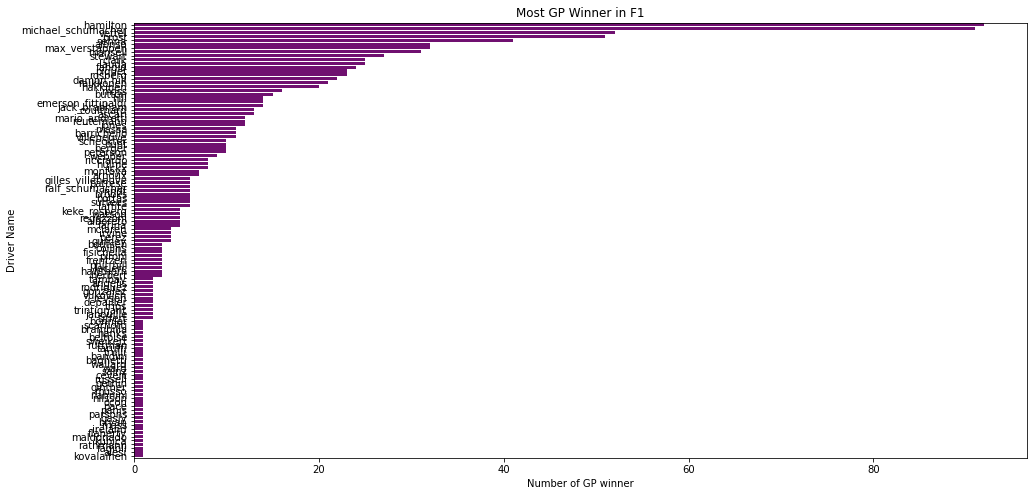

In [33]:
# Bar plot
plt.figure(figsize=(16,8))
sns.barplot(data=driver_winner,y='driver',x='positionOrder',color='purple')
plt.title('Most GP Winner in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP winner')
plt.show()

In [30]:
# Top 10 GP winner
top_10_driver=driver_winner.head(10)
top_10_driver

,driver,positionOrder
0,hamilton,92
1,michael_schumacher,91
2,vettel,52
3,prost,51
4,senna,41
5,alonso,32
6,max_verstappen,32
7,mansell,31
8,stewart,27
9,clark,25


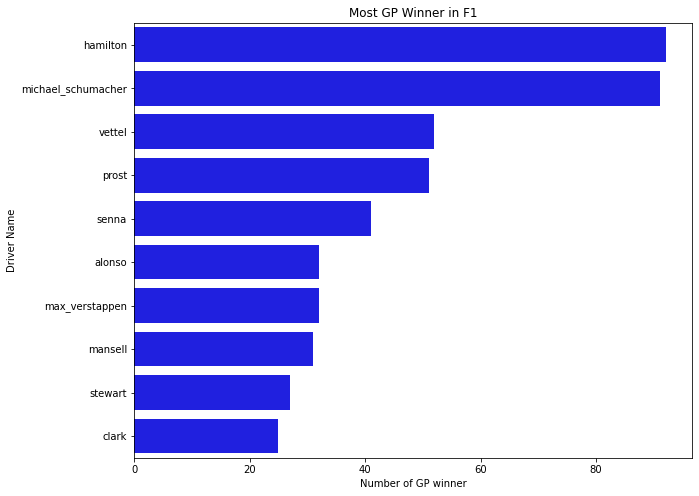

In [37]:
# TOP 10 Driver Bar plot
plt.figure(figsize=(10,8))
sns.barplot(data=top_10_driver,y='driver',x='positionOrder',color='Blue')
plt.title('Most GP Winner in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP winner')
plt.show()

In [38]:
# GP Constructors Winner
constructor_winner=dataset.loc[dataset['positionOrder']==1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

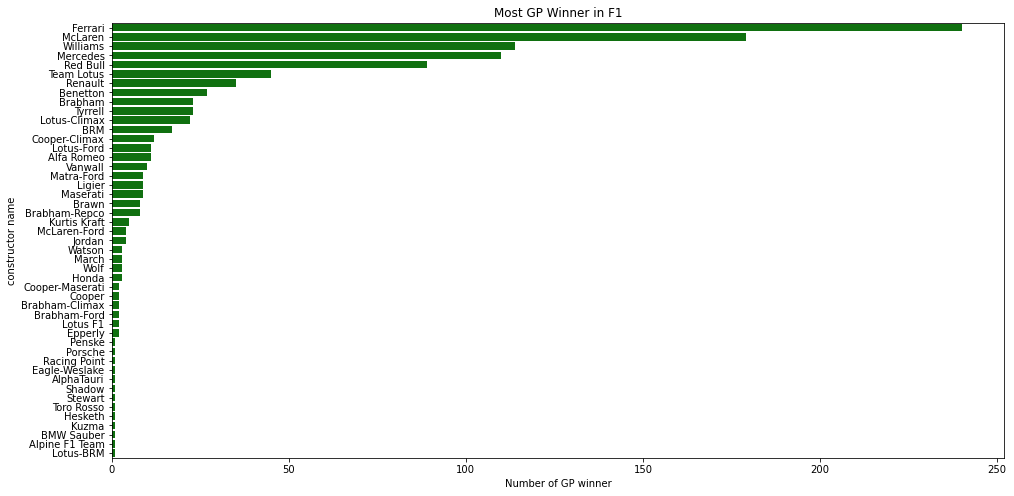

In [40]:
# Bar plot
plt.figure(figsize=(16,8))
sns.barplot(data=constructor_winner,y='constructor_name',x='positionOrder',color='green')
plt.title('Most GP Winner in F1')
plt.ylabel('constructor name')
plt.xlabel('Number of GP winner')
plt.show()

In [42]:
# Top 10 GP winner
top_10_constructor=constructor_winner.head(10)
top_10_constructor

,constructor_name,positionOrder
0,Ferrari,240
1,McLaren,179
2,Williams,114
3,Mercedes,110
4,Red Bull,89
5,Team Lotus,45
6,Renault,35
7,Benetton,27
8,Brabham,23
9,Tyrrell,23


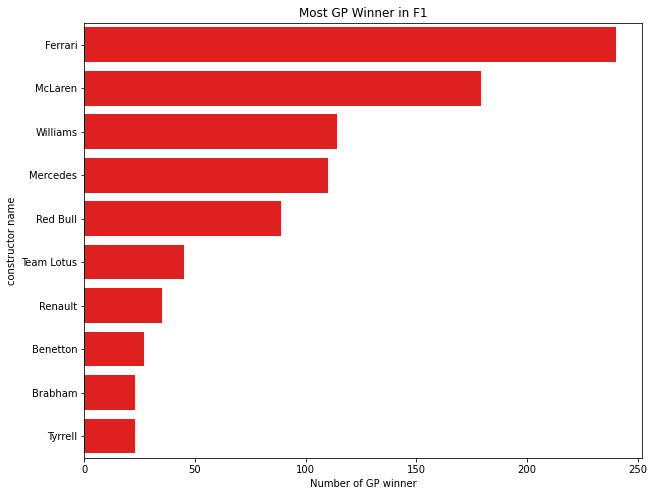

In [43]:
# TOP 10 Driver Bar plot
plt.figure(figsize=(10,8))
sns.barplot(data=top_10_constructor,y='constructor_name',x='positionOrder',color='red')
plt.title('Most GP Winner in F1')
plt.ylabel('constructor name')
plt.xlabel('Number of GP winner')
plt.show()

In [44]:
dataset_no_zero=dataset[dataset['grid']!=0]

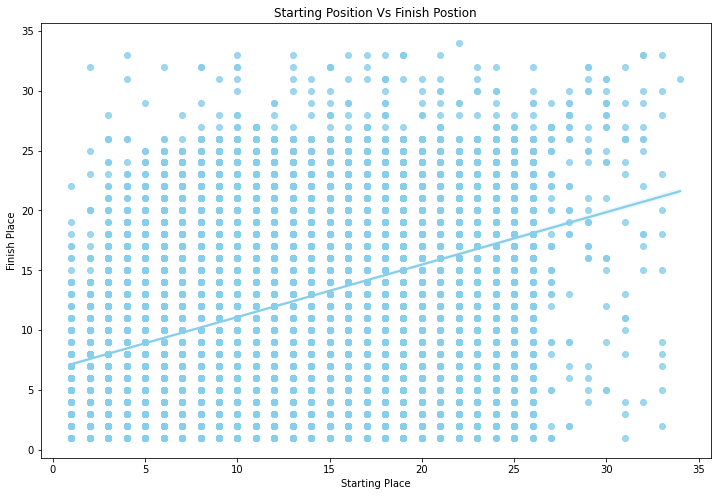

In [47]:
plt.figure(figsize=(12,8))
sns.regplot(data=dataset_no_zero,y='grid',x='positionOrder',color='skyblue')
plt.title('Starting Position Vs Finish Postion')
plt.ylabel('Finish Place')
plt.xlabel('Starting Place')
plt.show()